In [39]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [123]:
# Model Parameter
mu = 1.2 # 1.2 - 1.32 - 1.385 - 1.43 - 1.55 - 1.65

# Sample Time
dt = 0.01

# Simulation Time
N = 50000
t = np.arange(N)*dt

# Initial Values
x0 = .5
y0 = .5
z0 = .5

In [124]:
# Dynamics of The Model
def f(x, y, z):
    xdot = x*0.5 - x*0.5*x + x*0.5 - x*0.5*y + x*0.1 - x*0.1*z
    ydot = -y*0.5 + y*0.5*x - y*0.1 + y*0.1*y + y*0.1 - y*0.1*z
    zdot = z*mu - z*mu*x + z*0.1 - z*0.1*y + z*0.1 - z*0.1*z
    return xdot, ydot, zdot

In [125]:
# State Transition using Runge-Kutta Method
def next(x, y, z):
    xdot1, ydot1, zdot1 = f(x, y, z)
    xdot2, ydot2, zdot2 = f(x + xdot1*dt/2, y + ydot1*dt/2, z + zdot1*dt/2)
    xdot3, ydot3, zdot3 = f(x + xdot2*dt/2, y + ydot2*dt/2, z + zdot2*dt/2)
    xdot4, ydot4, zdot4 = f(x + xdot3*dt, y + ydot3*dt, z + zdot3*dt)
    xnew = x + (xdot1 + 2*xdot2 + 2*xdot3 + xdot4)*dt/6
    ynew = y + (ydot1 + 2*ydot2 + 2*ydot3 + ydot4)*dt/6
    znew = z + (zdot1 + 2*zdot2 + 2*zdot3 + zdot4)*dt/6
    return xnew, ynew, znew

In [126]:
# Simulation Loop
x = np.zeros(N)
y = np.zeros(N)
z = np.zeros(N)
x[0] = x0
y[0] = y0
z[0] = z0
for k in range(N-1):
    x[k+1], y[k+1], z[k+1] = next(x[k], y[k], z[k])

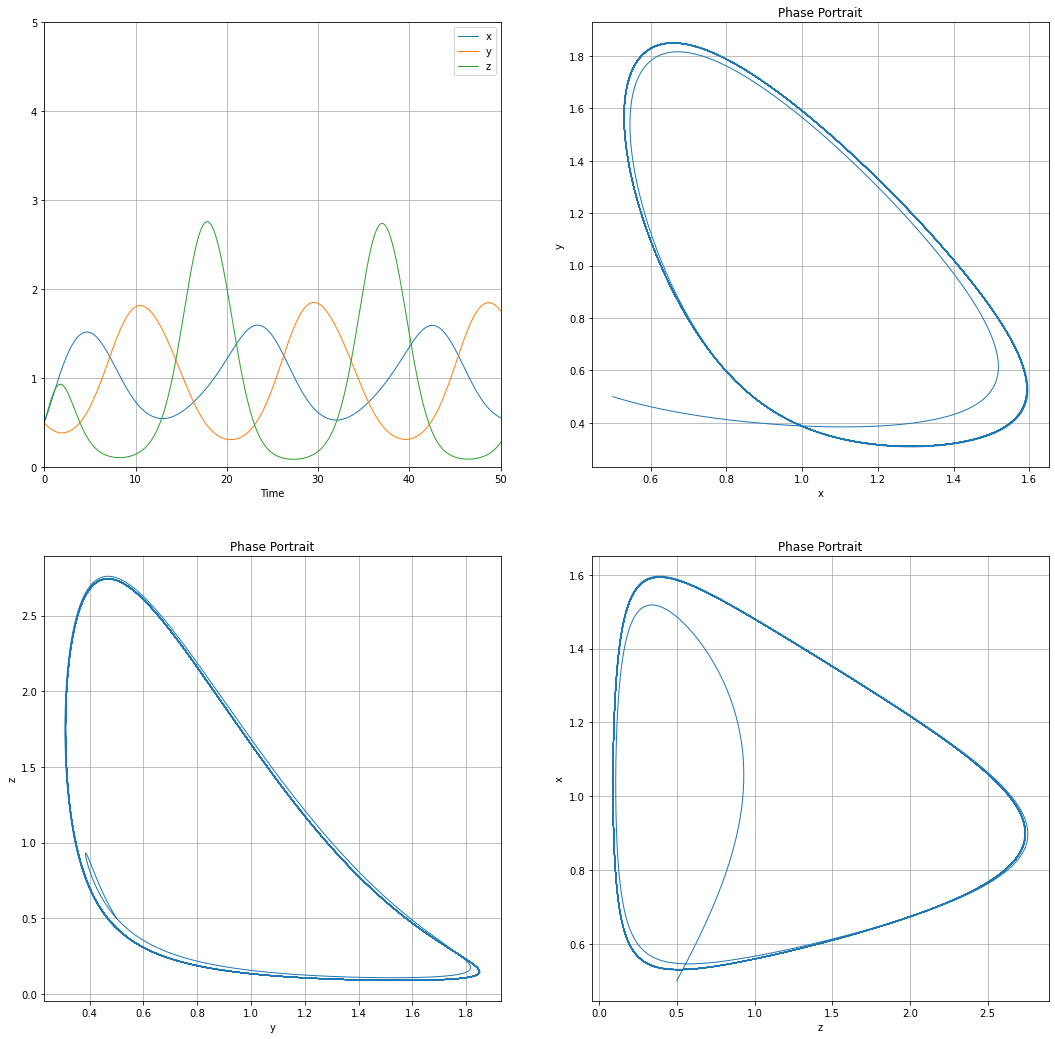

In [127]:
# Plot Results
plt.figure(figsize=(18, 18))
plt.subplot(2,2,1)
plt.plot(t, x, label='x', linewidth=1)
plt.plot(t, y, label='y', linewidth=1)
plt.plot(t, z, label='z', linewidth=1)
plt.grid()
plt.legend(loc = 'upper right')
plt.ylim(0, 5)
plt.xlim(0, 50)
plt.xlabel('Time')

plt.subplot(2,2,2)
plt.plot(x, y, linewidth=1)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase Portrait')

plt.subplot(2,2,3)
plt.plot(y, z, linewidth=1)
plt.grid()
plt.xlabel('y')
plt.ylabel('z')
plt.title('Phase Portrait')

plt.subplot(2,2,4)

plt.plot(z, x, linewidth=1)
plt.grid()
plt.xlabel('z')
plt.ylabel('x')
plt.title('Phase Portrait')

plt.show()

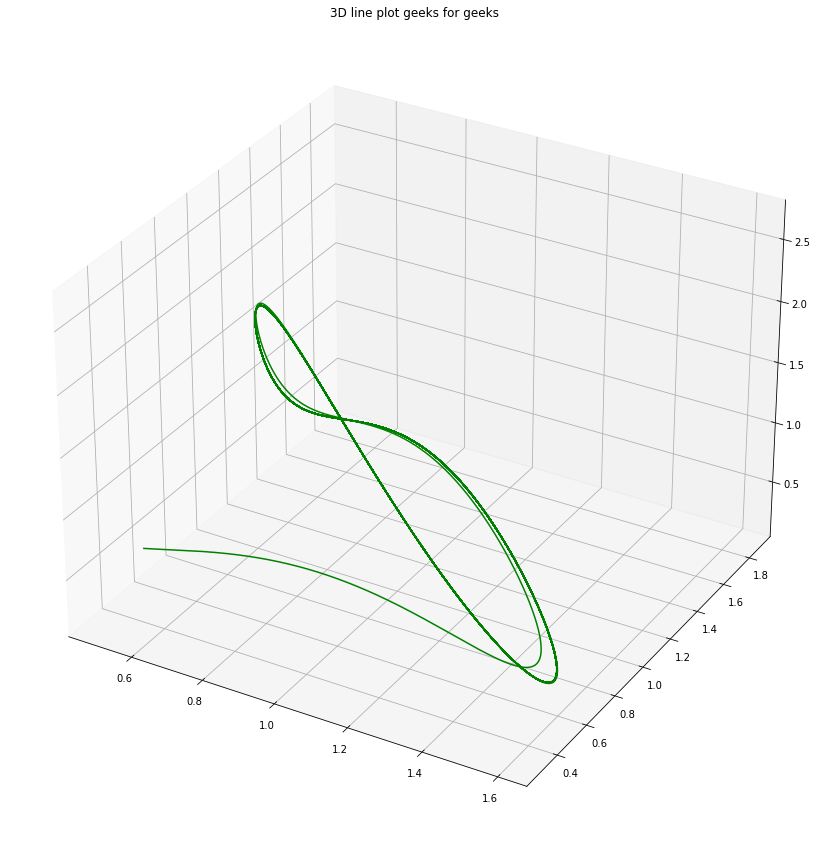

In [128]:
fig = plt.figure(figsize=(15, 15))
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# plotting

ax.plot3D(x, y, z, 'green')
ax.set_title('3D line plot geeks for geeks')
plt.show()

![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/069d31edeb54fb88a27c537506e67939eed386bb)

In [3]:
from numpy import array, arange, zeros, dot, log
import matplotlib.pyplot as plt
from numpy.linalg import norm

In [10]:
# Evolution equation of tracjectories and tangential vectors
def f(r):
    x = r[0]
    y = r[1]
    z = r[2]

    fx = x*0.5 - x*0.5*x + x*0.5 - x*0.5*y + x*0.1 - x*0.1*z
    fy = -y*0.5 + y*0.5*x - y*0.1 + y*0.1*y + y*0.1 - y*0.1*z
    fz = z*mu - z*mu*x + z*0.1 - z*0.1*y + z*0.1 - z*0.1*z

    return array([fx,fy,fz], float)

def jacobian(r):
    M = zeros([3,3])
    M[0,:] = [0.5*(1-2*r[0]), 0.5*(1-r[1]), 0.1*(1-r[2])]
    M[1,:] = [-0.5*(1-r[0]), -0.1*(1-2*r[1]), 0.1*(1-r[2])]
    M[2,:] = [mu*(1-r[0]), 0.1*(1-r[1]), 0.1*(1-2*r[2])]

    return M

def g(d, r):
    dx = d[0]
    dy = d[1]
    dz = d[2]

    M = jacobian(r)

    dfx = dot(M, dx)
    dfy = dot(M, dy)
    dfz = dot(M, dz)

    return array([dfx, dfy, dfz], float)

In [11]:
# Initial conditions
d = array([[1,0,0], [0,1,0], [0,0,1]], float)
r = array([.5, .5, .5], float)
mu = 1.2 

T  = 10**5                         # time steps 
dt = 0.01                          # time increment
Teq = 10**4                        # Transient time

l1, l2, l3 = 0, 0, 0               # Lengths

xpoints, ypoints, zpoints  = [], [], []

In [12]:
# Transient
for t in range(Teq):
    # RK4 - Method 
    k1  = dt * f(r)                 
    k11 = dt * g(d, r)

    k2  = dt * f(r + 0.5 * k1)
    k22 = dt * g(d + 0.5 * k11, r + 0.5 * k1)

    k3  = dt * f(r + 0.5 * k2)
    k33 = dt * g(d + 0.5 * k22, r + 0.5 * k2)

    k4  = dt * f(r + k3)
    k44 = dt * g(d + k33, r + k3)

    r  += (k1  + 2 * k2  + 2 * k3  + k4)  / 6
    d  += (k11 + 2 * k22 + 2 * k33 + k44) / 6

    # Gram-Schmidt-Scheme
    orth_1 = d[0]                    
    d[0] = orth_1 / norm(orth_1)

    orth_2 = d[1] - dot(d[1], d[0]) * d[0]
    d[1] = orth_2 / norm(orth_2)

    orth_3 = d[2] - (dot(d[2], d[1]) * d[1]) - (dot(d[2], d[0]) * d[0]) 
    d[2] = orth_3 / norm(orth_3)

In [13]:
for t in range(T):
    k1  = dt * f(r)                 
    k11 = dt * g(d, r)

    k2  = dt * f(r + 0.5 * k1)
    k22 = dt * g(d + 0.5 * k11, r + 0.5 * k1)

    k3  = dt * f(r + 0.5 * k2)
    k33 = dt * g(d + 0.5 * k22, r + 0.5 * k2)

    k4  = dt * f(r + k3)
    k44 = dt * g(d + k33, r + k3)

    r  += (k1  + 2 * k2  + 2 * k3  + k4)  / 6
    d  += (k11 + 2 * k22 + 2 * k33 + k44) / 6

    orth_1 = d[0]                    # Gram-Schmidt-Scheme
    l1 += log(norm(orth_1))
    d[0] = orth_1 / norm(orth_1)

    orth_2 = d[1] - dot(d[1], d[0]) * d[0]
    l2 += log(norm(orth_2))
    d[1] = orth_2 / norm(orth_2)

    orth_3 = d[2] - (dot(d[2], d[1]) * d[1]) - (dot(d[2], d[0]) * d[0]) 
    l3 += log(norm(orth_3))
    d[2] = orth_3 / norm(orth_3)

In [14]:
# Correct Solution (2.16, 0.0, -32.4)

lya1 = l1 / (dt * T)
lya2 = l2 / (dt * T)  - lya1
lya3 = l3 / (dt * T) -  lya1 - lya2 

lya1, lya2, lya3

(0.1594046807479525, -0.21715928335066348, -0.5438428050927988)

In [16]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from pylab import xlabel, ylabel, title
import matplotlib.pyplot as pl

In [129]:
# x is proportional to convective intensity
# y is related to the temperature difference between descending and ascending currents
# z is the difference in vertical temperature profile from linearity in the systems of equations

#%% Parameters
sigma = 10.
b     = (8./3.)
r     = 21.
dt    = 0.01
tmax  = 5000.0

# Initial conditions
x0 = 0.0
y0 = 1e-9
z0 = 0.0

x1 = 10.0
y1 = 10.0
z1 = 10.0

t = 0.

# Prepare empty arrays
X0, X1, Y0, Y1, Z0, Z1, T = [], [], [], [], [], [], []
X0.append(x0)
Y0.append(y0)
Z0.append(z0)
T.append(t)
X1.append(x1)
Y1.append(y1)
Z1.append(z1)
T.append(t)

In [130]:
#%% Functions

def x_dot(x, y):
    return sigma*(y-x)

def y_dot(x, y, z):
    return r*x - x*z - y

def z_dot(x, y, z):
    return x*y - b*z

In [131]:
#%% Main for loop

while t <= tmax:
    
    # Update values for r0
    x0 += x_dot(x0, y0)*dt
    y0 += y_dot(x0, y0, z0)*dt
    z0 += z_dot(x0, y0, z0)*dt
    
    X0.append(x0)
    Y0.append(y0)
    Z0.append(z0)
    
    # Update values for r1
    x1 += x_dot(x1, y1)*dt
    y1 += y_dot(x1, y1, z1)*dt
    z1 += z_dot(x1, y1, z1)*dt
    
    X1.append(x1)
    Y1.append(y1)
    Z1.append(z1)
    
    # Update time
    t += dt
    T.append(t)

# Calculate exponents
if r >= 1:
    Cp = np.sqrt(b*(r-1))

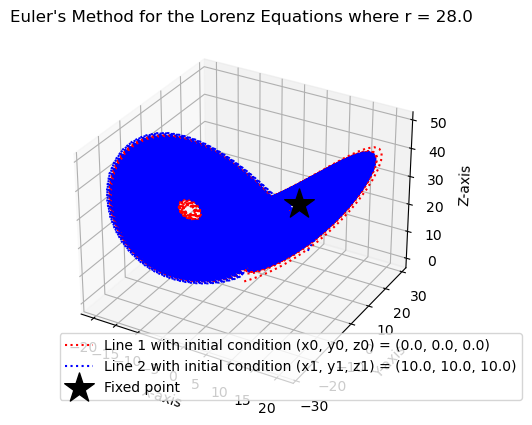

In [132]:
#%% Plot

# Plot 3D
mpl.rcParams['legend.fontsize'] = 10
fig = pl.figure(figsize=(8,5), dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X-axis', fontsize=10)
ax.set_ylabel('Y-axis', fontsize=10)
ax.set_zlabel('Z-axis', fontsize=10)
ax.plot(X0, Y0, Z0, ':', color="r", label = "Line 1 with initial condition (x0, y0, z0) = (%1.1f, %1.1f, %1.1f)" %(X0[0], Y0[0], Z0[0]))
ax.plot(X1, Y1, Z1, ':', color="b", label = "Line 2 with initial condition (x1, y1, z1) = (%1.1f, %1.1f, %1.1f)" %(X1[0], Y1[0], Z1[0]))
ax.scatter(Cp, Cp, (r-1), s=500, color="k", marker="*", label="Fixed point")
pl.title(r"Euler's Method for the Lorenz Equations where r = %1.1f" %r, fontsize=12)
ax.legend(loc='lower left')
pl.show()

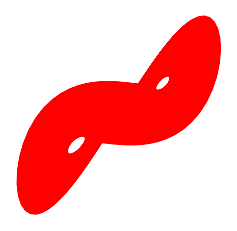

In [36]:
# Plot XY Projectidata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAO0AAADnCAYAAADy1tHpAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjQuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/MnkTPAAAACXBIWXMAAAsTAAALEwEAmpwYAAAPEUlEQVR4nO3dfaxmVXXH8e+aN8ZhuEORwjhlitLhVa1AFXSaIJjGoVJNsCi1bQQDBZUY0oQRtRogpVU6jW0stUYMtgxClRAlohEaQ2ltABGDFkRFLEWlUCEDFAbaAVb/OHfaAe7Lc+9Z+6yzz/l9kicI97LOiuE3e5/znL23uTsiUo8l2Q2IyMIotCKVUWhFKqPQilRGoRWpjEIrUhmFVqQyCq1IZRRakcootCKVUWhFKqPQilRGoRWpjEIrUpll2Q2I9JrZSmB/4KXTnyngBuDbuD+b0ZJCK7Irs2XAW4EzgTfM8ZvbMdsKXAPcgPtTXbQHYFoELwKY7QmcAVy0yArvxH1rXEOz00gr42Z2APBB4PSWlS7DbAr3vw7oak56ECXjZLYUsz8B7qF9YHe6GLMPYWZB9Wak6bGMj9kG4O6CV9gCnEuhcGmklfEwW4LZBZQNLMBm4OOlimuklXEwWw/c1/FVX4H7ndFFNdLK8JkdS/eBBfhIiaIKrQyb2ftoXobIcDJmh0UXVWhlmMwMsxuATyR3ckF0Qd3TyvA0bzXtyG5jF4fhfldUMY20Mixme9CvwELwaKuRVobDbA3wSHYbszgI95CvmjTSyjCYTdHfwAIcH1VIoZX6ma0GHs1uYx4bowppeix1M9sdeDy7jYm4h7yTrJFW6mW2iloCC2C2LqKMQit1anaUeCK7jQV6XUQRhVbqY7YEeDK7jUX49YgiuqeV+pjV+h/t47jv0baIRlqpi9n/ZLfQwurpaX0rCq3Uw+zvgeXZbbR0ZNsCCq3Uwex04OTsNgK8qm0BhVb6z+xI4JLsNoKsaVtAoZV+M9sLuC27jUB6ECUD1iyxezi7jWAKrQxa35bYRdD0WAbK7MfZLRSiB1EyQM2T4pdlt1FI69DqjSjpl5ytTrvVcrWPQiv9YbYcqPmNp8m0DK2mx9Inww9sAIVW+sHsluwWaqHQSj6z1wNHZbfRmZan6umeVnI1u0/Utpi9HT2IkqrVuzZ28fQgSqpl9nR2CzVSaCWH2SZgaXYbCVpvWK7QSvfMdgO+lt1GktvbFlBoJcNT2Q0kurdtAYVWumU2pLWxi/HztgUUWumO2csJ2COpcv/ZtoBCK91o9iq+I7uNHtBIK9V4JruBntBIKxUw+8PsFnqk9UirN6KkrGZz7hqP8Chld9y3tymg0EpZY3xNcS4Bx11qeizlmN2e3ULPhNzXK7RShtl+BOyHNDB/F1FEoZV4zXrRn2S30UM3RxRRaKWEZ7Mb6KlbI4ootBLLLOTg5IG6M6KInh5LnGZarFF2NgFPjkEjrcRSYGd3dVQhhVZimA3h7NiSrokqpOmxtNcsBtC7xXM7FPfvRxRSaKU9vfU0iaW4h9w+aHos7Zidlt1CFYICCwqttNFMiz+T3UYFLoksptBKG7qPncz1kcUUWlmc5gzZ0h7p4Bpd+GZkMT2IkoUr/7R4He7/MX2tFcB/F7xWeUEvVeykkVYWo1Rg34G7/V9gAdxrP/7yQ9EFl0UXlIEzO6NQ5Zfg/sAM1wsdpRJcFV1Q02OZXLlp8V64b5vlmhuBfylwzW4ET41BI20Os72AA4B9gA3AEdOfqEXj9wM/AL47/bkXeGD6s43F/0ldIrBrZw1so97Awh+VKKrQltJM69YChwFvAE4GfqWjq6+b/hw3S2+7/t0PgJumP3fRLF6//wX3kma/X6DPI3B/cNafmr26wDW79IUSRTU9jtKE9DDgPcBZyd1E+z5wSHDND+B+0aw/NVsO1P0QqsDUGBTaxWtCugE4EbgQWJ7bUGXm+g+6+f/2EWCqq3YKOB/3C0oU1vR4oZrzaP6K2aaeMon95vn516k7sABXlCqskXYSzYOj9wPnZrcyANtx333GnzRPp78HHNxpRyUUmhqDRtrZmS0DTqB5mLAiuZshOWXGf2q2DvhZt60Uc2HJ4noj6vnMpjD7DLAD+BIKbLTnnmVjthqzKxlOYAEuK1lc0+OdzFYBnwXent3KCJxD8x31OQxv4HgG96IzWIW2eSH9QmBzdisyCGfgHrp+9vnGG9rmnvUs4C+TO5FhWYl70VVJ43sQ1XwH+A7gc9mtyOCcUzqwMLaR1mxfmvdvRUrYA/fHS19kaA8BZtcsKVNgpZQ/7SKwMIaRtnkq/K80q2pEStkb94e7uNCwR9pmlcgTKLBS1uVdBRaGOtI2r8N9HDg7uxUZhf1w7+zlkOE9PW5OINeBxtKVa7sMLAxtpDU7mqDTtkUmdCDuP+rygsO5pzV7GwqsdOvWrgMLQwmt2akU2tpDZA5/kHHR+kNr9l6aF/1FuvRF3L+TceG672nNzgG2ZLcho7R2zk3pCqp3pDU7DwVWcpyaFViodaQ120KzFlOkaz8B9m+xd3RrdX1P26zQ+STw7uxWZLSOyQws1Dc93oICK3nej/u92U3UMz02+z3g8uw2ZNSW4Z5+kHYdoTU7mGaXe5Esr8D9zuwmoIbpsdlKFFjJtaUvgYW+j7TNg6fHgNXZrcioFd/3aSH6PtJehAIruTb2KbDQ59CaHYO2NZVcH8b9puwmnq+f02NtwCb5tgKnZH8nO5P+hbbZj3hHdhsyanfTPC3u5fm4fZwea4mdZDuqr4GFvoXW7ASaQ5pFshyA+yPZTcylP9Njs+VAb/90k1F4Le63ZDcxnz6NtF/ObkBG7aQaAgt9Ca3ZLwGbstuQ0fow7ldnNzGpfkyPzXrQhIzUpcDpffxqZzb5I63ZcdktyGhdDpxZU2Ahe6RtTgJIX+oko/THwHm1BRbyd644N/n6Mk6n4X5pdhOLlTfSmk0Bj+ZcXEZsE+7XZzfRRuZI+/nEa8s4HZ61V3GknJFWO1FI99bj/tPsJiJkPT2+I+m6Mj7fAfYcSmAhI7RmryX/AZiMw8XAa3Af1LOT7qfHepFCunEs7jdmN1FCtyNt87qiSEl/Aew+1MBC99PUazq+noxLFat02upupG12pPi1zq4nY/JRmh0TBx9Y6HakPbvDa8k43Ae8ZQjfvS5Edw+i9ABK4mynOdPpStyfzm6ma91Mj80O7+Q6uX4IPJvdxMA9DZwE7IH71jEGFrq7p/1qR9fp2qnA3rgb7gcDu9Gsz5RYPwPeBKzA/WrcR/2HY/npsdmewLayF+ncJuAfZlzWZfZ64B+7bmigvkWzYf2NNS6hK6WLB1Ef6eAaXflb4N3zHBOxb0e9DNnHaO5Xv5vdSB+VHWmHtcj9pIn2ETK7FjihfDuD8wngSuAWjapzKz3Svqlw/a5snOhMF7N9UGAX4hLgCuCf+3BYcy1Kj7RPAKvKXaATkwUWwOw64I1l26na54EbgW8Ad479gdJilRtpm83Haw/sKQsI7JHEBvYMYB/gJdOflwMHB9Yv7cfAdTQB/Qbu9yX3Mxglp8e/XbB2F27E/bKJfrM5rf62wGv/Du4z7+zRHLQ9BaylCfPOv+783/sBBwFdLM7YBtxEsz76h9Ofu4EHdV9aTrnpsdlDwIvLFO/EGtwfm+g3zbYDLwq7sruF1WoeBq4B9trlsyew4nmf3WheDtlBczzLrn99DHhol89jCmWekiNtzYF91wICex6RgYWVgbWYvm/cNv25J7S2pCjzRpTZ+iJ1u3PFRL9ldhJwfuB1N8/zHbBIsdcYNxeq24U/m+hsUrM3AleFXtn9z0PrySCVuaete0XPb+D+9Tl/w+x3gc8FX3c17k8E15QBir+nNVsRXrNbc6/NNLsaeGvwNS9SYGVSJR5EHVugZpeWzvhPzdbRrDaJ5/6BInVlkErc055foGaXTnzO35mtx+w2SgUWfqFQXRmo+Hvauu9nd7oKeBJ4Z+HrfBL3swpfQwYmNrTNVz16XW1SkS9RyGhET4/fFlxvyH4xuwGpU/RI+yjNe7Eyt7/B/b3ZTUidokM7hPvZ8jQtlhbipsfNZuQyv72zG5C6Rd7T1rTWM8vHcH84uwmpW2RofzOw1jC5fzC7BalfZGjfHFhriNZkNyDDEBnaYwJrDc3midfniswj7umxnhzPTk+LJVDMSNtsaSIzi9zVQiRselz7ThWlnIj7U9lNyLBEhfaVQXWGxf1L2S3I8ESFdlNQnSGZeV2uSEtRoX1LUJ2hOEK750spUaH95aA6Q3At7rdnNyHDFfOVj77u+X/6ekcK01c1sbRGVoprH9rmbBmBs3F/KLsJGb720+Pm8KknQ7qpmabF0pGI6XHtx1lGWJ7dgIxHRGjH/pre4bg/nd2EjIdG2nY+hfvcJxKIBIu4p/1V5jtKY6h0HysJNNIuXuw5siITUmgX53U6R1ay6EHUwn0a95uzm5Dx0ki7UO5nZrcg46bQLoy+j5V0mh5P7gB9Hyt9EBHaMWy+fRru/5bdhAjEhLbUYct98W3cL81uQmSniJcr9gUeCOmmn5YQfvK2yOJFhHYJ8ExIN/3zIu2mKH3Tfno83L2QXqrASh9p54qZHY/7v2c3ITIThfaFPor7ddlNiMwmamO3m4Gj2xdK9yPcD8xuQmQuUSPtPwXVyXZQdgMi84kK7W1BdTKt0Fc7UoOo0P40qE6W1bjvyG5CZBJR97RTwKPtC6XYB/efZzchMqmYkbbeU843KLBSm8ivfD4bWKsLR+F+T3YTIgsVMz0GMFsP3BdTrLhNuF+f3YTIYsSFFmo5iOu3cP9KdhMiixX9RtTW4HrRjlNgpXbRI+2rgNvjCoY6GvdvZjch0lZ0aA3o46qfV+J+R3YTIhFip8fNnwBfCK3Z3oEKrAxJ7EgLYHYo8L3Yoou2FvcHs5sQiRS/NM/9LiB7aduTNLtOKLAyOKXW0765UN1JXIz7Ku06IUNVJrTNy/evKVJ7bsfj/r6E64p0ptzOFe7fottXG/fVjhMyBvEPop5T3VbS3F+WdBnwrgFvMCfyHGVDC2D2auDWApX/CzgE9/sL1BbprfIbuzXT5L2B2c5zXcwDo424TymwMkbd7Mbo/jDuK4G3z/DThZyo/h7cDfebgjoTqU63W6i6XwW8GLh2Af/WxcCRwFLcP1WkL5GKlL+nnfXKtgpYD+wPbAAOBQ4BHqd5FfKL+q5V5IXyQisii6ITBkQqo9CKVEahFamMQitSGYVWpDIKrUhlFFqRyii0IpVRaEUqo9CKVEahFamMQitSGYVWpDIKrUhlFFqRyvwvgWv9fp2mM2MAAAAASUVORK5CYII=on
pl.figure(figsize=(4,4))
pl.plot(X1, Y1, 'r')
pl.axis('off')
pl.show()

Fixed points, C+ = 8.48528137423857 8.48528137423857 27.0


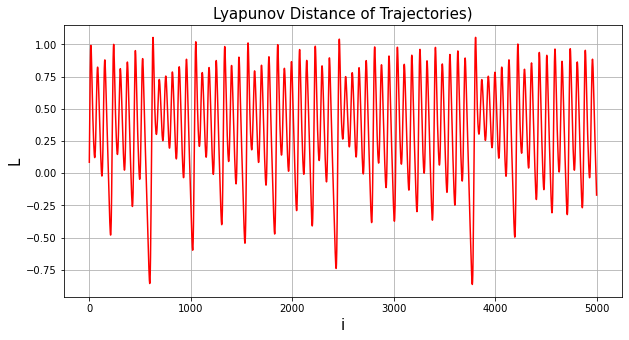

In [37]:
#%% Calculate Lyampnov Exponents

print("Fixed points, C+ =", Cp, Cp, (r-1))

L, I = [], []
K3 = np.array([X1[0], Y1[0], Z1[0]])
K4 = np.array([X0[0], Y0[0], Z0[0]])

pl.figure(figsize=(10,5))
pl.xlabel("i", fontsize=15)
pl.ylabel("L", fontsize=15)
pl.title("Lyapunov Distance of Trajectories)", fontsize=15)
    
for i in range(1, int(tmax)):   
    K1 = np.array([X1[i], Y1[i], Z1[i]])
    K2 = np.array([X0[i], Y0[i], Z0[i]])
    
    I.append(i)
    L.append(np.linalg.norm(K1-K2)/np.linalg.norm(K3-K4))
    
pl.plot(I, np.log(L), 'r')
pl.grid()
pl.show()